# Live 03 - 29 Setembro 2023

Notebook realizado durante a aula ao vivo do dia 29 de Setembro de 2023. O tema era "VGerando Visualizações Parte I".

## 0. Imports e Load

In [73]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [79]:
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

In [18]:
df_raw = pl.read_csv('data/StudentsPerformance.csv', separator=';')
df_raw

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
str,str,str,str,str,i64,i64,i64
"""female""","""group B""","""bachelor's deg…","""standard""","""none""",72,72,74
"""female""","""group C""","""some college""","""standard""","""completed""",69,90,88
"""female""","""group B""","""master's degre…","""standard""","""none""",90,95,93
"""male""","""group A""","""associate's de…","""free/reduced""","""none""",47,57,44
"""male""","""group C""","""some college""","""standard""","""none""",76,78,75
"""female""","""group B""","""associate's de…","""standard""","""none""",71,83,78
"""female""","""group B""","""some college""","""standard""","""completed""",88,95,92
"""male""","""group B""","""some college""","""free/reduced""","""none""",40,43,39
"""male""","""group D""","""high school""","""free/reduced""","""completed""",64,64,67


## 1. Exploração

In [19]:
# Criando uma cópia do dataframe
df1 = df_raw.clone()

In [20]:
# Verificando quantidade de valores nulos
df1.select(pl.all().is_null().sum())

# Forma alternativa
#df1.null_count()

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0


In [21]:
# Verificando a quantidade de valores duplicados
df1.is_duplicated().sum()

0

In [22]:
df1.null_count().transpose().to_series()

column_0
u32
0
0
0
0
0
0
0
0


In [23]:
# Criando um Dataframe semelhante ao df.info do pandas
pl.DataFrame({
    '#': range(0, len(df1.columns)),
    'Colunas': df1.columns,
    'Nulls': df1.null_count().transpose().to_series(),
    'Count': df1.select(pl.all().count()).transpose().to_series(),
    'Dtype': df1.dtypes
    })

#,Colunas,Nulls,Count,Dtype
i64,str,u32,u32,object
0,"""gender""",0,1000,Utf8
1,"""race/ethnicity…",0,1000,Utf8
2,"""parental level…",0,1000,Utf8
3,"""lunch""",0,1000,Utf8
4,"""test preparati…",0,1000,Utf8
5,"""math score""",0,1000,Int64
6,"""reading score""",0,1000,Int64
7,"""writing score""",0,1000,Int64


In [24]:
# Verificando a quantidade de valores únicos
pl.DataFrame({
    'Columns': df1.columns,
    'N Unique': df1.select(pl.all().n_unique()).transpose().to_series(),
})

Columns,N Unique
str,u32
"""gender""",2
"""race/ethnicity…",5
"""parental level…",6
"""lunch""",2
"""test preparati…",2
"""math score""",81
"""reading score""",72
"""writing score""",77


In [25]:
df1.select(
    pl.col('race/ethnicity').value_counts()
)

race/ethnicity
struct[2]
"{""group B"",190}"
"{""group A"",89}"
"{""group E"",140}"
"{""group C"",319}"
"{""group D"",262}"


In [26]:
df1.select(
    pl.col('parental level of education').value_counts()
)

parental level of education
struct[2]
"{""associate's degree"",222}"
"{""high school"",196}"
"{""some college"",226}"
"{""master's degree"",59}"
"{""some high school"",179}"
"{""bachelor's degree"",118}"


In [27]:
# Descrevendo o dataframe
df_describe = df1.describe().transpose(include_header=True)
df_describe.rename(
    dict(zip(
        df_describe.columns,
        df_describe.head(1).transpose().to_series()
    ))
).slice(1)


describe,count,null_count,mean,std,min,25%,50%,75%,max
str,str,str,str,str,str,str,str,str,str
"""gender""","""1000""","""0""",null,null,"""female""",null,null,null,"""male"""
"""race/ethnicity…","""1000""","""0""",null,null,"""group A""",null,null,null,"""group E"""
"""parental level…","""1000""","""0""",null,null,"""associate's de…",null,null,null,"""some high scho…"
"""lunch""","""1000""","""0""",null,null,"""free/reduced""",null,null,null,"""standard"""
"""test preparati…","""1000""","""0""",null,null,"""completed""",null,null,null,"""none"""
"""math score""","""1000.0""","""0.0""","""66.089""","""15.16308009600…","""0.0""","""57.0""","""66.0""","""77.0""","""100.0"""
"""reading score""","""1000.0""","""0.0""","""69.169""","""14.60019193725…","""17.0""","""59.0""","""70.0""","""79.0""","""100.0"""
"""writing score""","""1000.0""","""0.0""","""68.054""","""15.19565701086…","""10.0""","""58.0""","""69.0""","""79.0""","""100.0"""


In [29]:
# Criando coluna Total Score
df1 = df1.with_columns(
    pl.sum_horizontal(['math score', 'reading score', 'writing score']).alias('total score')
).with_columns(
    (pl.col('total score') / 3).round(2).alias('avg score')
)

In [30]:
# Verificando quantas pessoas gabaritaram os testes
def gabaritou(col_name:str = 'math score') -> int:
    return df1.filter(
        pl.col(col_name) == 100
    ).select(
        pl.col(col_name).count()
    ).row(0)[0]

print(f'Quantidade de pessoas que gabaritaram o teste de Matematica: {gabaritou()}')
print(f'Quantidade de pessoas que gabaritaram o teste de Leitura: {gabaritou("reading score")}')
print(f'Quantidade de pessoas que gabaritaram o teste de Escrita: {gabaritou("writing score")}')

Quantidade de pessoas que gabaritaram o teste de Matematica: 7
Quantidade de pessoas que gabaritaram o teste de Leitura: 17
Quantidade de pessoas que gabaritaram o teste de Escrita: 14


In [31]:
# Verificando a porcentagem de pessoas que gabaritaram os testes

total = len(df1)

print(f'Quantidade de pessoas que gabaritaram o teste de Matematica: {gabaritou()/total*100:.2f}%')
print(f'Quantidade de pessoas que gabaritaram o teste de Leitura: {gabaritou("reading score")/total*100:.2f}%')
print(f'Quantidade de pessoas que gabaritaram o teste de Escrita: {gabaritou("writing score")/total*100:.2f}%')

Quantidade de pessoas que gabaritaram o teste de Matematica: 0.70%
Quantidade de pessoas que gabaritaram o teste de Leitura: 1.70%
Quantidade de pessoas que gabaritaram o teste de Escrita: 1.40%


In [32]:
# Média das notas por raça/etnia
df1.group_by('race/ethnicity').agg(
    pl.col(['math score', 'reading score', 'writing score']).mean().round(2)
).sort(by='race/ethnicity', descending=False)

race/ethnicity,math score,reading score,writing score
str,f64,f64,f64
"""group A""",61.63,64.67,62.67
"""group B""",63.45,67.35,65.6
"""group C""",64.46,69.1,67.83
"""group D""",67.36,70.03,70.15
"""group E""",73.82,73.03,71.41


In [33]:
# Média das notas por genero
df1.group_by('gender').agg(
    pl.col(['math score', 'reading score', 'writing score']).mean().round(2)
).sort(by='gender', descending=False)

gender,math score,reading score,writing score
str,f64,f64,f64
"""female""",63.63,72.61,72.47
"""male""",68.73,65.47,63.31


In [34]:
# Média das notas por genero e raça/etnia
df1.group_by(['gender', 'race/ethnicity']).agg(
    pl.col(['math score', 'reading score', 'writing score']).mean().round(2)
).sort(by=['gender', 'race/ethnicity'], descending=False)

gender,race/ethnicity,math score,reading score,writing score
str,str,f64,f64,f64
"""female""","""group A""",58.53,69.0,67.86
"""female""","""group B""",61.4,71.08,70.05
"""female""","""group C""",62.03,71.94,71.78
"""female""","""group D""",65.25,74.05,75.02
"""female""","""group E""",70.81,75.84,75.54
"""male""","""group A""",63.74,61.74,59.15
"""male""","""group B""",65.93,62.85,60.22
"""male""","""group C""",67.61,65.42,62.71
"""male""","""group D""",69.41,66.14,65.41


In [35]:
# Média das notas por genero e raça/etnia
df1.group_by(['gender', 'race/ethnicity']).agg(
    pl.col(['math score', 'reading score', 'writing score']).mean().round(2),
    pl.col('avg score').count().alias('N Pessoas')
).sort(by=['gender', 'race/ethnicity'], descending=False)

gender,race/ethnicity,math score,reading score,writing score,N Pessoas
str,str,f64,f64,f64,u32
"""female""","""group A""",58.53,69.0,67.86,36
"""female""","""group B""",61.4,71.08,70.05,104
"""female""","""group C""",62.03,71.94,71.78,180
"""female""","""group D""",65.25,74.05,75.02,129
"""female""","""group E""",70.81,75.84,75.54,69
"""male""","""group A""",63.74,61.74,59.15,53
"""male""","""group B""",65.93,62.85,60.22,86
"""male""","""group C""",67.61,65.42,62.71,139
"""male""","""group D""",69.41,66.14,65.41,133


## 2. Gráficos

In [36]:
df2 = df1.clone()

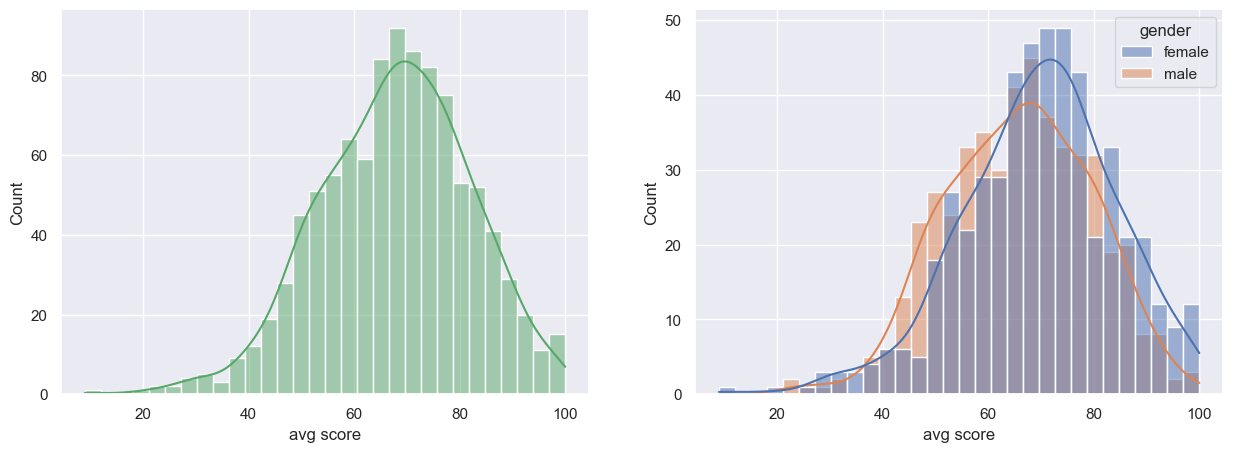

In [87]:
ax, fig = plt.subplots(1, 2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df2, x='avg score', bins = 30, kde=True, color='g')

plt.subplot(1, 2, 2)
sns.histplot(df2, x='avg score', bins = 30, kde=True, hue='gender')

plt.show()

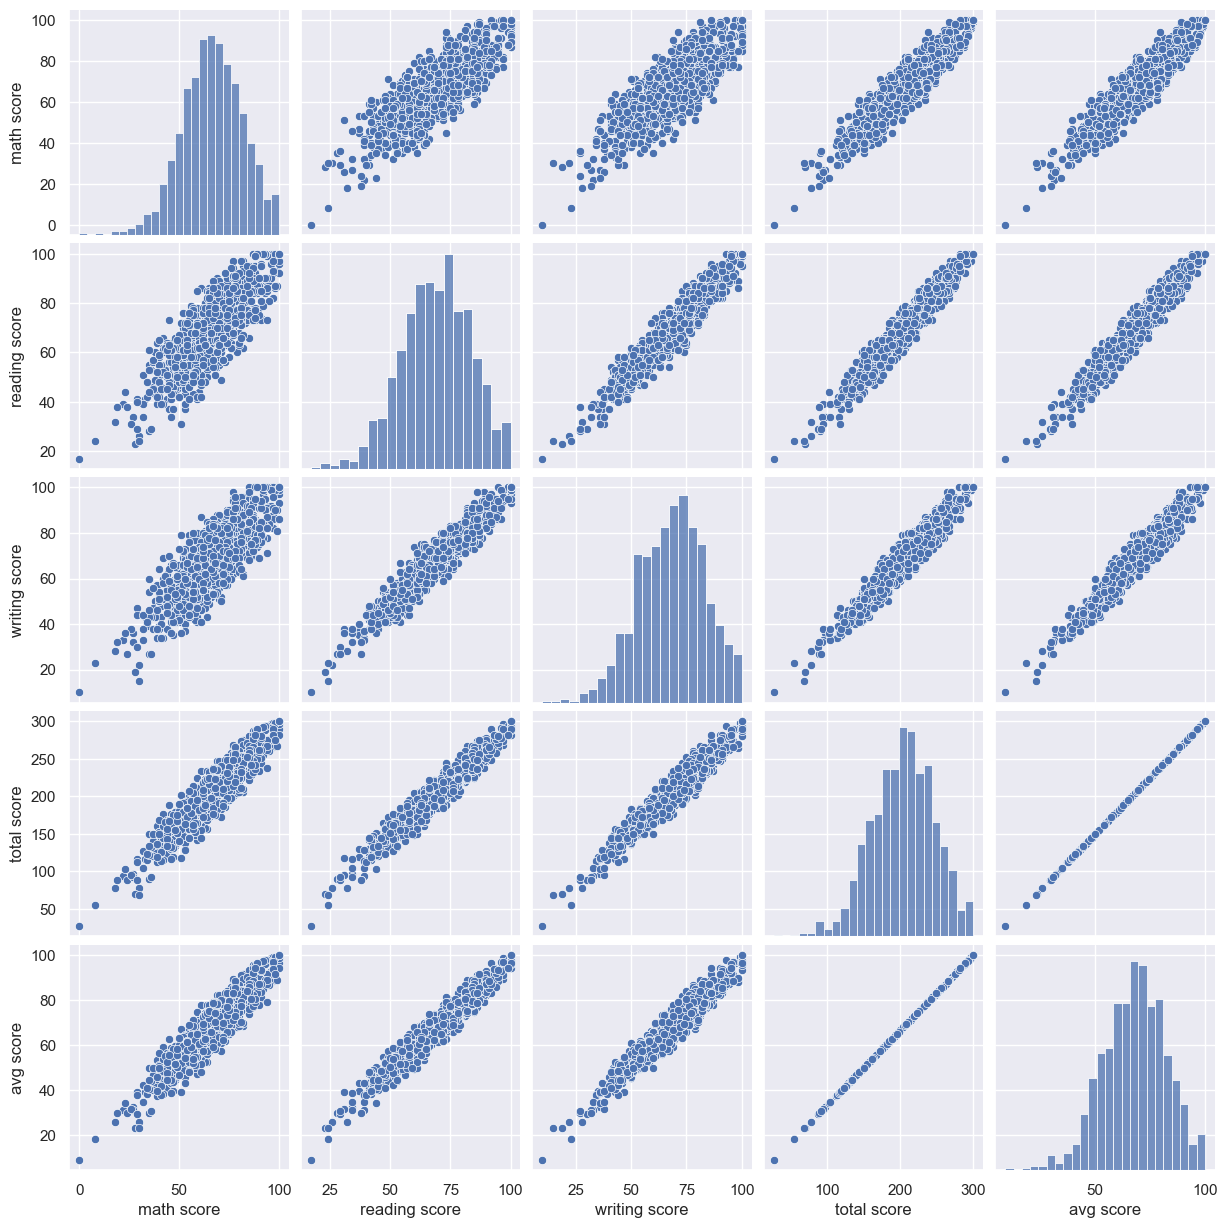

In [89]:
sns.pairplot(df2.to_pandas())

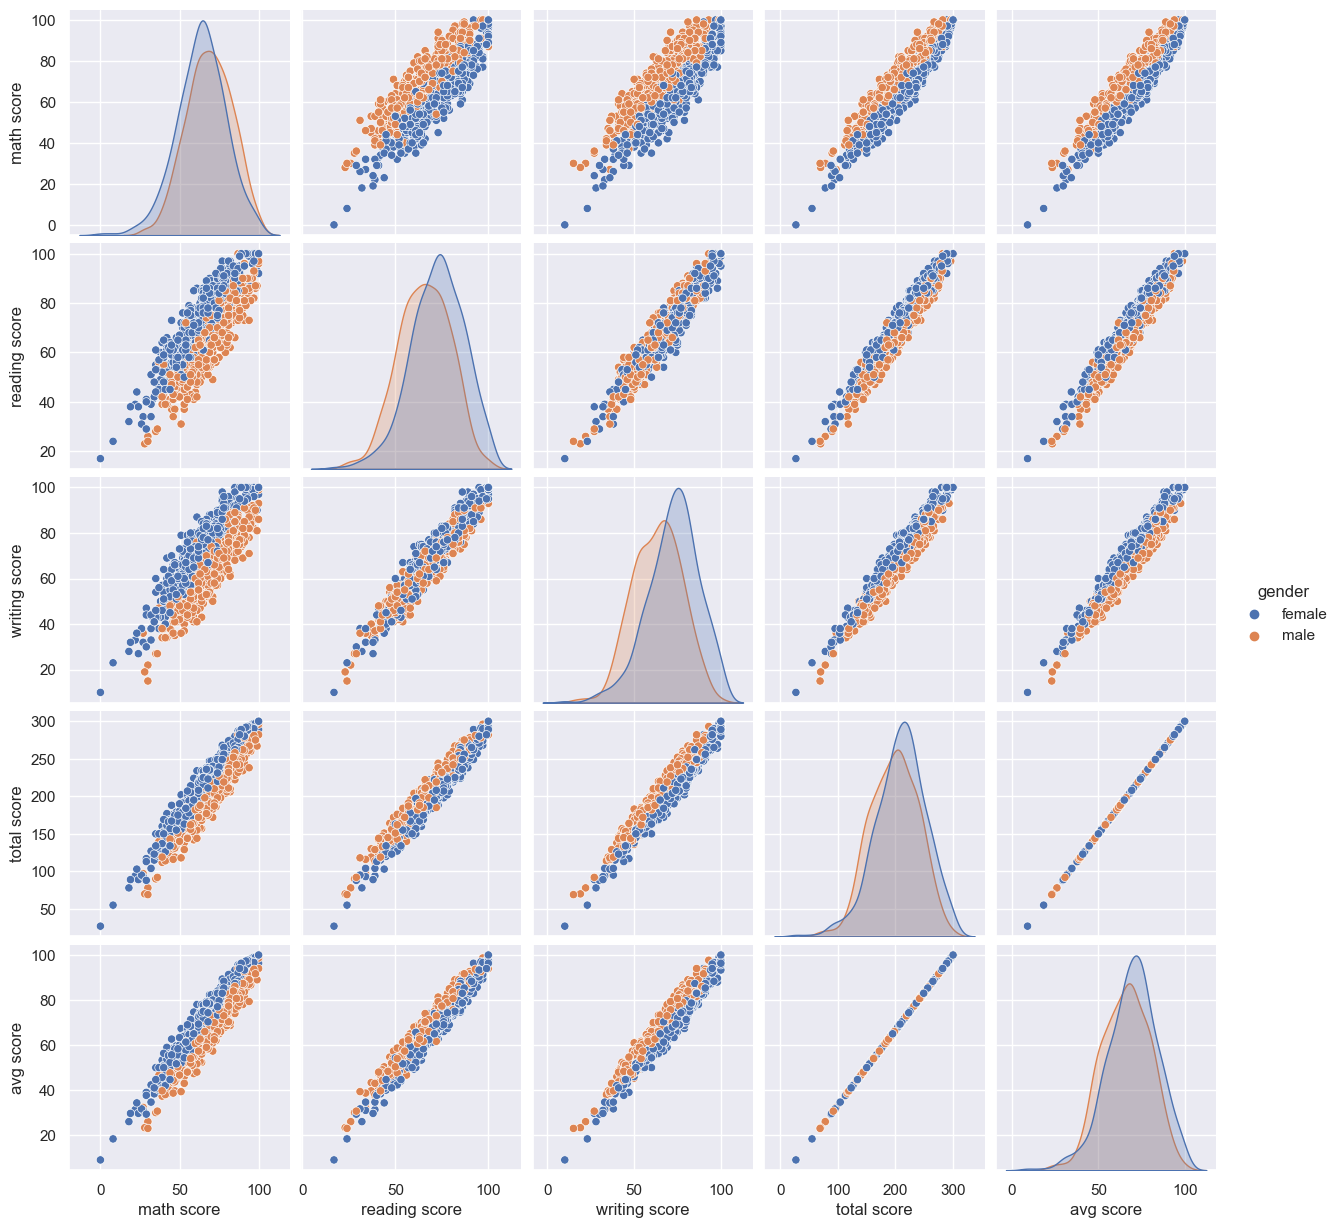

In [90]:
sns.pairplot(df2.to_pandas(), hue='gender')

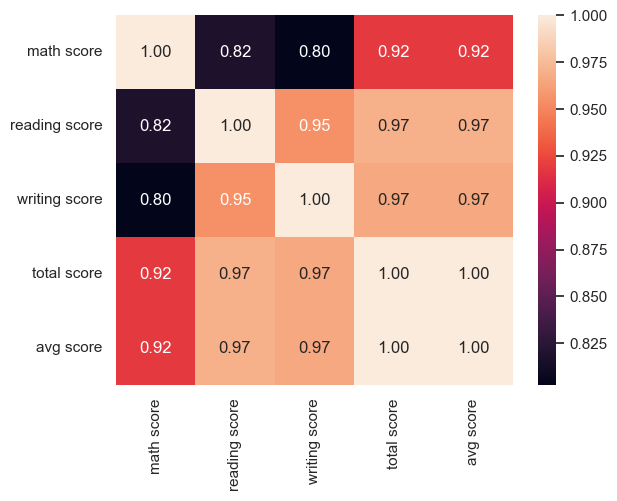

In [100]:
sns.heatmap(
    df2.select(pl.col([pl.Float64, pl.Int64])).to_pandas().corr(), 
    annot=True,
    fmt='.2f'
);

## 3. Extra: Pivot Table

In [101]:
df3 = df2.clone()

In [107]:
df3.pivot(
    values='math score',
    index=['gender', 'race/ethnicity'],
    columns='parental level of education',
    aggregate_function='mean'
)

gender,race/ethnicity,bachelor's degree,some college,master's degree,associate's degree,high school,some high school
str,str,f64,f64,f64,f64,f64,f64
"""female""","""group B""",71.363636,61.133333,70.8,62.652174,59.0,56.227273
"""female""","""group C""",65.807692,63.613636,62.0,64.777778,55.633333,58.5
"""male""","""group A""",72.333333,65.3,73.0,63.625,60.454545,59.071429
"""male""","""group C""",72.5,67.8,70.0,69.393939,65.558824,63.285714
"""male""","""group B""",66.777778,64.590909,49.0,70.5,60.9,69.5
"""male""","""group D""",65.666667,69.40625,83.625,71.5,63.740741,71.08
"""female""","""group A""",51.666667,62.125,50.0,57.5,60.428571,58.7
"""female""","""group D""",69.769231,68.114286,66.6,63.375,61.470588,62.44
"""female""","""group E""",74.8,70.0625,72.428571,74.833333,65.833333,62.166667
